In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
import datetime
from pathlib import Path
from scipy import interpolate
import pyproj
import warnings
warnings.filterwarnings("ignore")

In [27]:
df = pd.read_csv(r"C:\Users\julik\sciebo\Master\Geophyphox\Excursion 2022\G-858\G_858.dat",delim_whitespace=True)
len(df)

359

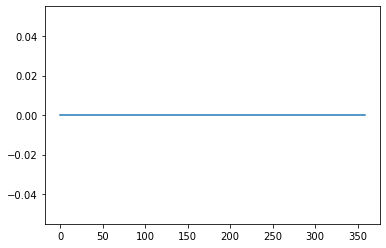

In [28]:
df
df["lon"] = np.zeros((len(df)))
GPS1 = (np.linspace(0,50,len(df[df["LINE"]==4])),np.linspace(0,50,len(df[df["LINE"]==4])))
df2 = pd.DataFrame((np.linspace(0,50,len(df[df["LINE"]==4])),np.linspace(0,50,len(df[df["LINE"]==4])))).transpose()
# df["lon"].where(df["LINE"]==5) =df2
df[df["LINE"]==4]["lon"] = 4
plt.plot(df["lon"])

In [39]:
gps = pd.read_csv(r"C:\Users\julik\sciebo\Master\Geophyphox\Excursion 2022\G-858\waypoints.csv")
# gps.sort_values(by="name",inplace=True,ascending=False)
# gps.reset_index(inplace=True,drop=True)
# Projecting coordinates
projection = pyproj.Proj(proj='utm',zone=32, lat_ts=gps['y'].mean()) #'merc',proj='utm',zone=32,ellps='WGS84'
# Project the dataset coordinates:
easting, northing = projection(np.array(gps['x']), np.array(gps['y']))

gps['x'] = easting
gps['y'] = northing
gps


,x,y,ele,time,name,group,Ref
0,307724.620993,5.636131e+06,155.578857,2022/07/09 13:17:16+00,882,4,0
1,307735.163402,5.636143e+06,155.050507,2022/07/09 13:16:46+00,881,4,0
2,307746.655603,5.636149e+06,154.771683,2022/07/09 13:16:31+00,880,4,0
3,307758.557761,5.636154e+06,155.058914,2022/07/09 13:16:19+00,879,4,0
4,307773.643255,5.636162e+06,155.364365,2022/07/09 13:16:04+00,878,4,0
...,...,...,...,...,...,...,...
347,307650.318710,5.636250e+06,149.779510,2022/07/09 10:37:46+00,535,0,0
348,307651.713197,5.636254e+06,150.080017,2022/07/09 10:37:12+00,534,0,0
349,307654.643819,5.636257e+06,149.970215,2022/07/09 10:36:19+00,533,0,0
350,307654.697747,5.636256e+06,150.159180,2022/07/09 10:35:49+00,532,0,0


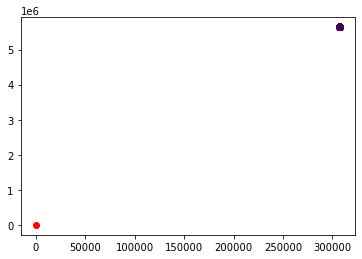

In [40]:
plt.scatter(gps["x"],gps["y"],c=gps["group"])
plt.scatter(6.267393,50.844585,color="red")


In [54]:
x1 = pd.DataFrame([])
for i in (0,1,2,3,4):
    print("GPS{}".format(i),len(gps[gps["group"]==i]))
    print("MAG{}".format(i),len(df[df["LINE"]==i]))


GPS0 125
MAG0 129
GPS1 95
MAG1 94
GPS2 77
MAG2 79
GPS3 23
MAG3 24
GPS4 32
MAG4 33


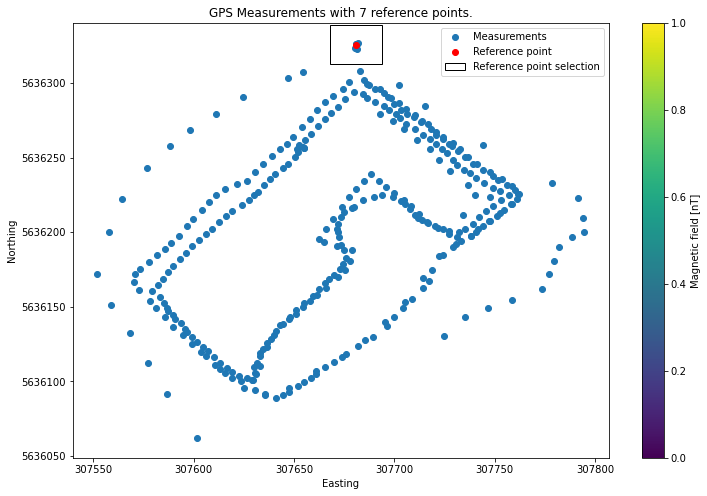

In [55]:
# Defining the reference location and tolerance
# Using first measurement locaion as default
data_outlier = gps
refPointX = data_outlier['x'].iloc[31]
refPointY = data_outlier['y'].iloc[31]
# Defining the tolerance
tolX = 13
tolY = 13

refMinX, refMaxX = (refPointX-tolX, refPointX+tolX)
refMinY, refMaxY = (refPointY-tolY, refPointY+tolY)

maskX = np.logical_and(data_outlier['x'] < refMaxX, data_outlier['x'] > refMinX)
maskY = np.logical_and(data_outlier['y'] < refMaxY, data_outlier['y'] > refMinY)
maskAll = np.logical_and(maskX, maskY)

data_base = data_outlier.loc[maskAll]
nDataBase = len(data_base['x'])

# Plotting reference measurements
fig, ax = plt.subplots(figsize=(12, 8))

im = ax.scatter(data_outlier['x'], data_outlier['y'],  clip_on=True, label='Measurements')
ax.set(xlabel='Easting', ylabel='Northing', title=f'GPS Measurements with {nDataBase} reference points.')
refArea = mpl.patches.Rectangle((refMinX, refMinY), width=refMaxX-refMinX, height=refMaxY-refMinY,
                               fill=False, label='Reference point selection')
ax.set_yticklabels(['{:}'.format(int(_)) for _ in ax.get_yticks().tolist()]) # Fixes y-axis tick labels
ax.add_artist(refArea)
im_ref = ax.scatter(refPointX, refPointY, c='r', zorder=3, label='Reference point')
plt.colorbar(im, ax=ax, label='Magnetic field [nT]')
ax.legend(handles=[im, im_ref, refArea]);

In [38]:
plt.figure(10,10)
plt.scatter(gps["x"],gps["y"])
plt.scatter(data_base["x"],data_base["y"],label="reference positions count {}".format(len(data_base)))
plt.grid()
plt.legend()
len(data_base)


TypeError: Value after * must be an iterable, not int

In [46]:
print(len(df),len(data_outlier))

359 352


In [44]:
G_858 = pd.concat([data_outlier,df],axis=1)

In [45]:
G_858

,x,y,ele,time,name,group,X,Y,READING_2,TIME,DATE,LINE,MARK
0,307724.620993,5.636131e+06,155.578857,2022/07/09 13:17:16+00,882.0,4.0,20.0,640.0,53660.917,14:36:55.50,07/09/22,4,32
1,307735.163402,5.636143e+06,155.050507,2022/07/09 13:16:46+00,881.0,4.0,20.0,620.0,48937.675,14:33:08.80,07/09/22,4,31
2,307746.655603,5.636149e+06,154.771683,2022/07/09 13:16:31+00,880.0,4.0,20.0,600.0,48912.468,14:32:41.70,07/09/22,4,30
3,307758.557761,5.636154e+06,155.058914,2022/07/09 13:16:19+00,879.0,4.0,20.0,580.0,48975.540,14:32:29.40,07/09/22,4,29
4,307773.643255,5.636162e+06,155.364365,2022/07/09 13:16:04+00,878.0,4.0,20.0,560.0,48958.203,14:32:16.60,07/09/22,4,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,NaN,NaN,NaN,NaN,NaN,NaN,0.0,80.0,48459.021,11:54:28.70,07/09/22,0,4
355,NaN,NaN,NaN,NaN,NaN,NaN,0.0,60.0,48537.032,11:53:46.40,07/09/22,0,3
356,NaN,NaN,NaN,NaN,NaN,NaN,0.0,40.0,48370.503,11:53:09.10,07/09/22,0,2
357,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20.0,48409.265,11:49:18.00,07/09/22,0,1


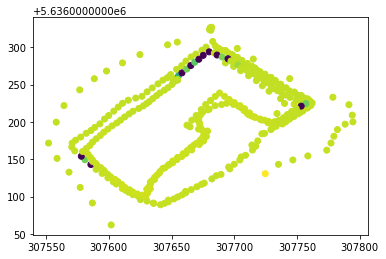

In [47]:
plt.scatter(x=G_858["x"],y=G_858["y"],c=G_858["READING_2"])

In [10]:
gps = pd.read_csv(r"C:\Users\julik\sciebo\Master\Geophyphox\Excursion 2022\G-858\waypoints.csv")
gps

,x,y,ele,time,name,group
0,6.268735,50.844885,155.578857,2022/07/09 13:17:16+00,882,5
1,6.268878,50.845001,155.050507,2022/07/09 13:16:46+00,881,5
2,6.269038,50.845057,154.771683,2022/07/09 13:16:31+00,880,5
3,6.269204,50.845110,155.058914,2022/07/09 13:16:19+00,879,5
4,6.269414,50.845184,155.364365,2022/07/09 13:16:04+00,878,5
...,...,...,...,...,...,...
347,6.267618,50.845935,149.779510,2022/07/09 10:37:46+00,535,1
348,6.267636,50.845966,150.080017,2022/07/09 10:37:12+00,534,1
349,6.267676,50.845994,149.970215,2022/07/09 10:36:19+00,533,1
350,6.267677,50.845990,150.159180,2022/07/09 10:35:49+00,532,1


In [23]:
groups = gps["group"].unique()
folder = Path(r"C:\Users\julik\sciebo\Master\Geophyphox\Excursion 2022\G-858\Groups\GPS")
for group in groups:
    print(group)
    df_student = gps.where(gps["group"]==group)
    df_student.dropna(inplace=True)
    df_student.sort_values(by="name",ascending=True,inplace=True)
    df_student.reset_index(inplace=True,drop=True)
    df_student.drop(columns="name",inplace=True)
    # df_student["id"] = np.arange(0,len(df_student))
    # df_student.drop(columns=["id"],inplace=True)
    df_student.to_csv(os.path.join(folder, "GPS"+str(group)+".csv"))
    print("group:",group,"length:",len(df_student))


5
group: 5 length: 32
4
group: 4 length: 23
3
group: 3 length: 77
2
group: 2 length: 95
1
group: 1 length: 125


In [13]:
groups

array([5, 4, 3, 2, 1], dtype=int64)